# Stock Portfolio Optimization Tool Using AI

# #Data exploration

In [2]:
%load_ext watermark
#%load_ext zipline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import zipline
import warnings
import pyfolio as pf
import empyrical as ep
from yahoofinancials import YahooFinancials
from datetime import datetime
from dateutil.relativedelta import relativedelta

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


C:\Anaconda\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [3]:


#dataFileName = input("Please enter the name of the data file.")
#print(dataFileName)

#stock_data = pd.read_csv("Stocks/"+dataFileName+".csv")
stock_data = pd.read_csv("Stocks/prices.csv")
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
stock_data.dropna()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [5]:
stock_data.isnull()

,date,symbol,open,close,low,high,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [6]:
stock_data.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
date      851264 non-null datetime64[ns]
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [8]:
stock_data.tail(n=2)

,date,symbol,open,close,low,high,volume
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.59,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.48,705100.0


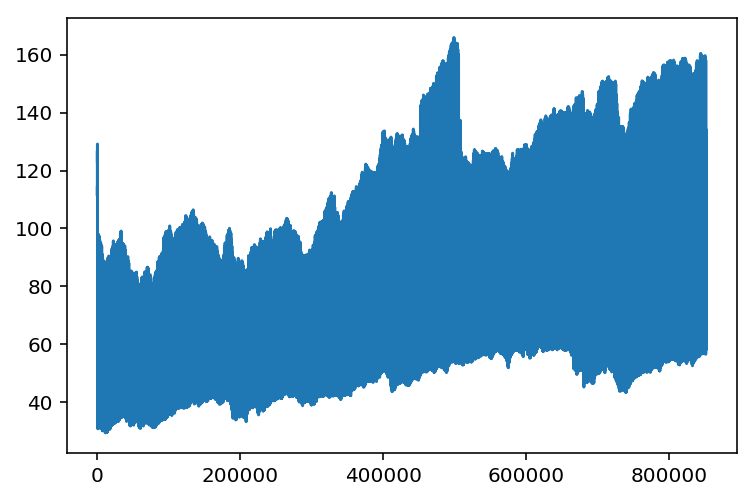

In [9]:
stock_data['open'].rolling(25).mean().plot()

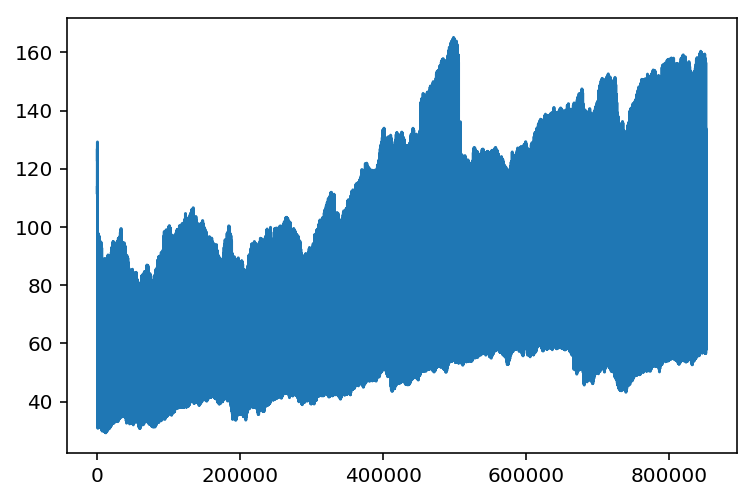

In [10]:
stock_data['close'].rolling(25).mean().plot()

In [11]:
stock_data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [12]:
graph_df = pd.DataFrame()

for symbol in stock_data['symbol'].unique():
    print(symbol)
    symbol_df = stock_data.copy()[stock_data['symbol']==symbol]
    symbol_df.set_index("date", inplace=True)
    symbol_df.sort_index(inplace=True)
    symbol_df[f'{symbol}_close25ma'] = symbol_df['close'].rolling(25).mean()
    symbol_df[f'{symbol}_open25ma'] = symbol_df['open'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = symbol_df[[f'{symbol}_close25ma']]
    else:
        graph_df = graph_df.join(symbol_df[f'{symbol}_close25ma'])
    

WLTW
A
AAL
AAP
AAPL
ABC
ABT
ACN
ADBE
ADI
ADM
ADP
ADS
ADSK
AEE
AEP
AES
AET
AFL
AGN
AIG
AIZ
AJG
AKAM
ALB
ALK
ALL
ALXN
AMAT
AME
AMG
AMGN
AMP
AMT
AMZN
AN
ANTM
AON
APA
APC
APD
APH
ARNC
ATVI
AVB
AVGO
AVY
AWK
AXP
AYI
AZO
BA
BAC
BAX
BBBY
BBT
BBY
BCR
BDX
BEN
BHI
BIIB
BK
BLK
BLL
BMY
BSX
BWA
BXP
C
CA
CAG
CAH
CAT
CB
CBG
CBS
CCI
CCL
CELG
CERN
CF
CHD
CHK
CHRW
CI
CINF
CL
CLX
CMA
CMCSA
CME
CMG
CMI
CMS
CNC
CNP
COF
COG
COH
COL
COO
COP
COST
CPB
CRM
CSCO
CSX
CTAS
CTL
CTSH
CTXS
CVS
CVX
CXO
D
DAL
DD
DE
DFS
DG
DGX
DHI
DHR
DIS
DISCA
DISCK
DLR
DLTR
DNB
DOV
DOW
DPS
DRI
DTE
DUK
DVA
DVN
EA
EBAY
ECL
ED
EFX
EIX
EL
EMN
EMR
ENDP
EOG
EQIX
EQR
EQT
ES
ESRX
ESS
ETFC
ETN
ETR
EW
EXC
EXPD
EXPE
EXR
F
FAST
FCX
FDX
FE
FFIV
FIS
FISV
FITB
FL
FLIR
FLR
FLS
FMC
FOX
FOXA
FRT
FSLR
FTI
FTR
GD
GE
GGP
GILD
GIS
GLW
GOOG
GOOGL
GPC
GPN
GPS
GRMN
GS
GT
GWW
HAL
HAR
HAS
HBAN
HBI
HCN
HCP
HD
HES
HIG
HOG
HOLX
HON
HP
HPQ
HRB
HRL
HRS
HSIC
HST
HSY
HUM
IBM
ICE
IDXX
IFF
ILMN
INTC
INTU
IP
IPG
IR
IRM
ISRG
ITW
IVZ
JBHT
JCI
JEC
JNJ
JNPR
JPM
JWN
K
KEY
KIM


In [13]:
graph_df.head()

,WLTW_close25ma,A_close25ma,AAL_close25ma,AAP_close25ma,AAPL_close25ma,ABC_close25ma,ABT_close25ma,ACN_close25ma,ADBE_close25ma,ADI_close25ma,...,CFG_close25ma,NAVI_close25ma,QRVO_close25ma,SYF_close25ma,WRK_close25ma,KHC_close25ma,PYPL_close25ma,HPE_close25ma,CSRA_close25ma,FTV_close25ma
date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,NaN,41.1012,42.9428,152.781600,111.3740,101.905199,44.8720,105.708401,92.625200,57.2352,...,26.3296,11.9418,54.3928,30.6460,46.627200,72.4538,35.6706,14.8352,28.6772,NaN
2016-01-06,NaN,41.0576,42.9416,152.160400,110.6700,102.030799,44.7776,105.506001,92.607600,56.8396,...,26.2756,11.9026,53.8548,30.5688,46.371199,72.4474,35.6194,14.8328,28.5392,NaN
2016-01-07,NaN,40.9752,42.8292,151.620001,109.8344,101.991999,44.6208,105.147201,92.469999,56.3936,...,26.1992,11.8234,53.3588,30.4372,46.082000,72.3446,35.5378,14.7568,28.4152,NaN
2016-01-08,NaN,40.9020,42.6912,151.125201,109.0616,101.956399,44.4388,104.771601,92.303200,55.9632,...,26.0864,11.7514,52.7992,30.3172,45.744400,72.2702,35.4394,14.7004,28.2924,NaN
2016-01-11,NaN,40.8136,42.6036,150.816001,108.3948,101.770399,44.3020,104.503601,92.281999,55.6480,...,25.9836,11.6818,52.2444,30.2216,45.313600,72.3026,35.3918,14.6460,28.2400,NaN


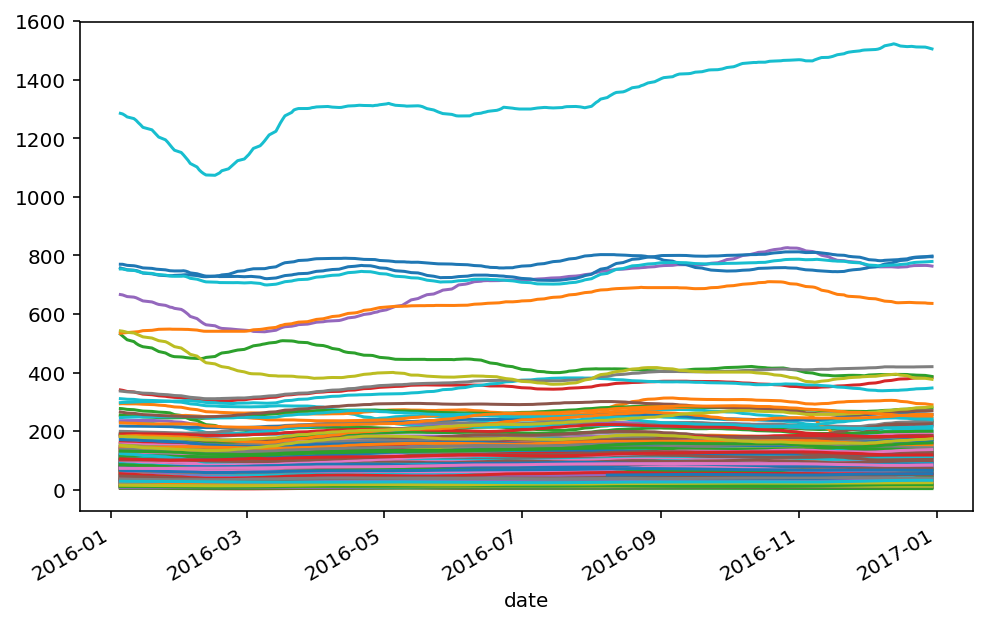

In [14]:
graph_df.plot(figsize=(8,5), legend=False)

# Markowitz

In [15]:
# https://towardsdatascience.com/algorithmic-trading-based-on-mean-variance-optimization-in-python-62bdf844ac5b

#selects the assets that are to be used in the portfolio
risky_assets = ['FB','AAPL','MCD','BP']

yahoo_financials = YahooFinancials(risky_assets)
data = yahoo_financials.get_historical_price_data('2019-01-01','2019-09-30','daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in risky_assets
})


prices_df.index.name="formatted_date"
prices_df.head()



,FB,AAPL,MCD,BP
formatted_date,,,,
2019-01-02,135.679993,155.582367,171.911087,36.290878
2019-01-03,131.740005,140.085220,170.778427,36.497772
2019-01-04,137.949997,146.065353,174.078751,37.645081
2019-01-07,138.050003,145.740265,175.973053,37.767342
2019-01-08,142.529999,148.518509,176.344086,37.645081


In [16]:
prices_df.columns

Index(['FB', 'AAPL', 'MCD', 'BP'], dtype='object')

In [17]:
prices_df.plot(kind='line',x='formatted_date',y='adjclose')
plt.show()

KeyError: 'formatted_date'

Text(0, 0.5, 'price in $')

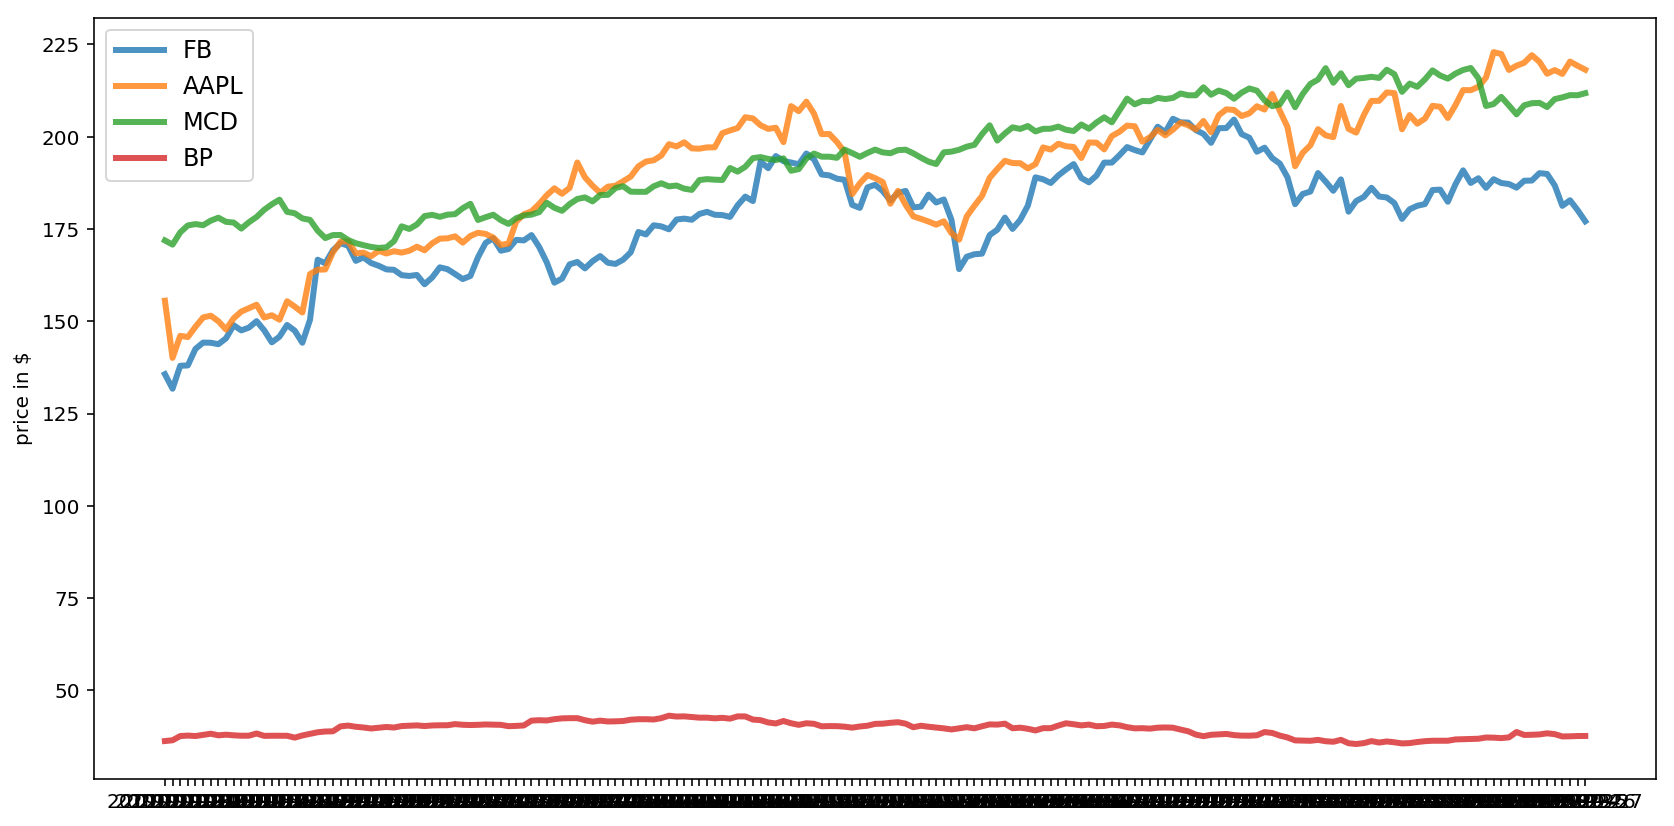

In [33]:
plt.figure(figsize=(14,7))
for c in prices_df.columns.values:
    plt.plot(prices_df.index,prices_df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')



<bound method NDFrame.describe of                         FB        AAPL         MCD         BP
formatted_date                                               
2019-01-02      135.679993  155.582367  171.911087  36.290878
2019-01-03      131.740005  140.085220  170.778427  36.497772
2019-01-04      137.949997  146.065353  174.078751  37.645081
2019-01-07      138.050003  145.740265  175.973053  37.767342
2019-01-08      142.529999  148.518509  176.344086  37.645081
2019-01-09      144.229996  151.040604  176.041397  37.955421
2019-01-10      144.199997  151.523376  177.271698  38.275169
2019-01-11      143.800003  150.035706  178.072372  37.842575
2019-01-14      145.389999  147.779602  176.949493  38.011848
2019-01-15      148.949997  150.804169  176.754196  37.842575
2019-01-16      147.539993  152.646484  175.123566  37.729717
2019-01-17      148.300003  153.552872  176.842087  37.739124
2019-01-18      150.039993  154.498657  178.267700  38.331589
2019-01-22      147.570007  151.0307